In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [55]:
# leitura dos dados com pandas
df = pd.read_csv('winequality.csv',sep=";")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,White,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,White,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,White,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,White,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
# encontrando correlação de cada feature com a variável target - qualidade
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity          -0.076743
volatile acidity       -0.265699
citric acid             0.085532
residual sugar         -0.036980
chlorides              -0.200666
free sulfur dioxide     0.055463
total sulfur dioxide   -0.041385
density                -0.029499
pH                      0.019506
sulphates               0.038485
Name: quality, dtype: float64


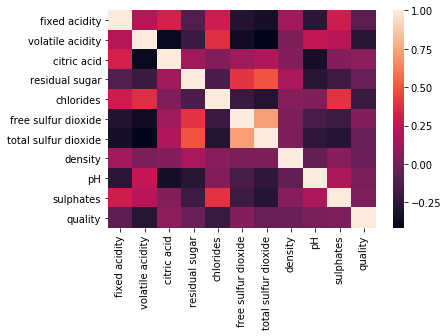

In [56]:
#desenhando um heatmap para detalhar a correlação
sns.heatmap(df.corr())
plt.show()

In [57]:
# funcão que retorna features cuja correlação esteja acima do valor threshold
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [39]:
#Criando 2 arrays: onde x contém as features e y contém valores para a variável quality 
features = get_features(0.05) 
print(features) 
x = df[features] 
y = df['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'free sulfur dioxide']


In [59]:
# Divindo os dados em treino e teste. 25% dos dados usados para teste e 75% para treino
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [60]:
#Verificando o tamanho do dataset de teste
y_test.shape


(1625,)

In [61]:
#Ajustando o modelo de regressão linear com os dados de treinamento
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
# Coeficientes das features selecionadas
regressor.coef_

array([-0.00787864, -1.23431175,  0.06772341, -2.8097913 , -0.0031391 ])

In [62]:
train_pred = regressor.predict(x_train)
train_pred

array([6.00676185, 4.95896889, 5.97636168, ..., 6.02066369, 5.69504471,
       5.22820858])

In [63]:
#Predição da qualidade do vinho segundo o modelo
test_pred = regressor.predict(x_test)
test_pred

array([5.42167988, 6.10105593, 5.52407213, ..., 5.97272723, 5.83538724,
       5.60853826])

In [ ]:
# A Raiz do erro quadrático médio (RMSE) é uma medida frequentemente usada nas diferenças entre os valores
# (amostra e população) previstos por um modelo e os valores realmente observados. 
# Para um bom modelo a RMSE dos conjuntos de treinamento e teste deve ser semelhante. 
# Se a RMSE do conjunto de testes for muito superior ao do conjunto de treinamento, é provável que tenhamos um sobreajuste (overfit) nos dados.


In [64]:
train_rmse = metrics.mean_squared_error(train_pred, y_train) ** 0.5
train_rmse

0.8292640124785938

In [65]:
test_rmse = metrics.mean_squared_error(test_pred, y_test) ** 0.5
test_rmse

0.8535341540354896

In [66]:
#Arredondando os valores previstos para o conjunto de testes
predicted_data = np.round_(test_pred)
predicted_data

array([5., 6., 6., ..., 6., 6., 6.])

In [67]:
print('Erro médio absoluto:', metrics.mean_absolute_error(y_test, test_pred))
print('Erro Quadrático Médio:', metrics.mean_squared_error(y_test, test_pred))
print('Raiz do erro quadrático médio:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Erro médio absoluto: 0.6458879754115197
Erro Quadrático Médio: 0.7285205521050789
Raiz do erro quadrático médio: 0.8535341540354896


In [68]:
coeffecients = pd.DataFrame(regressor.coef_,features)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
fixed acidity,-0.007879
volatile acidity,-1.234312
citric acid,0.067723
chlorides,-2.809791
free sulfur dioxide,-0.003139


,Coeffecient
fixed acidity,-0.007879
volatile acidity,-1.234312
citric acid,0.067723
chlorides,-2.809791
free sulfur dioxide,-0.003139
